In [47]:
import numpy as np
import sklearn.model_selection as skm
from pandas import read_csv
import pandas as pd

In [48]:
data_test = read_csv('data/test_motion_data.csv')
data_train=read_csv('data/train_motion_data.csv')

In [49]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3084 entries, 0 to 3083
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3084 non-null   float64
 1   AccY       3084 non-null   float64
 2   AccZ       3084 non-null   float64
 3   GyroX      3084 non-null   float64
 4   GyroY      3084 non-null   float64
 5   GyroZ      3084 non-null   float64
 6   Class      3084 non-null   object 
 7   Timestamp  3084 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 192.9+ KB


In [50]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3644 entries, 0 to 3643
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   AccX       3644 non-null   float64
 1   AccY       3644 non-null   float64
 2   AccZ       3644 non-null   float64
 3   GyroX      3644 non-null   float64
 4   GyroY      3644 non-null   float64
 5   GyroZ      3644 non-null   float64
 6   Class      3644 non-null   object 
 7   Timestamp  3644 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 227.9+ KB


In [51]:
data_train.isnull().values.any()

False

In [52]:
data_test.isnull().values.any()

False

In [53]:
data_train.shape

(3644, 8)

In [54]:
data_train.dtypes

AccX         float64
AccY         float64
AccZ         float64
GyroX        float64
GyroY        float64
GyroZ        float64
Class         object
Timestamp      int64
dtype: object

In [55]:
data_train


,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.000000,0.000000,0.000000,0.059407,-0.174707,0.101938,NORMAL,3581629
1,-1.624864,-1.082492,-0.204183,-0.028558,0.051313,0.135536,NORMAL,3581630
2,-0.594660,-0.122410,0.220502,-0.019395,-0.029322,0.087888,NORMAL,3581630
3,0.738478,-0.228456,0.667732,0.069791,-0.029932,0.054902,NORMAL,3581631
4,0.101741,0.777568,-0.066730,0.030696,-0.003665,0.054902,NORMAL,3581631
...,...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,1.687505,0.450360,0.384845,-1.236468,SLOW,3583789
3640,-1.934203,0.914925,-0.096013,0.321468,0.649350,-0.477162,SLOW,3583790
3641,-0.222845,0.747304,-0.887430,0.361174,-0.406836,0.054291,SLOW,3583790
3642,-0.349423,0.067261,0.394368,-0.132405,0.020159,-0.004963,SLOW,3583791


In [56]:
data_test

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ,Class,Timestamp
0,0.758194,-0.217791,0.457263,0.000000,0.000000,0.000000,AGGRESSIVE,818922
1,0.667560,-0.038610,0.231416,-0.054367,-0.007712,0.225257,AGGRESSIVE,818923
2,2.724449,-7.584121,2.390926,0.023824,0.013668,-0.038026,AGGRESSIVE,818923
3,2.330950,-7.621754,2.529024,0.056810,-0.180587,-0.052076,AGGRESSIVE,818924
4,2.847215,-6.755621,2.224640,-0.031765,-0.035201,0.035277,AGGRESSIVE,818924
...,...,...,...,...,...,...,...,...
3079,-0.713858,-0.652975,-0.164015,-0.147829,-1.309466,0.517250,SLOW,820706
3080,1.514261,0.330070,1.020714,1.321302,1.707598,-0.674548,SLOW,820707
3081,1.280216,-1.735172,-2.332695,0.583376,0.690507,-0.468075,SLOW,820707
3082,0.912313,0.583314,-0.965622,0.235794,0.512745,0.406073,SLOW,820708


In [57]:
from sklearn.model_selection import train_test_split

# mitadTrain=int(data_train.shape[0]/2)
# train_data, train_targets =  data_train[mitadTrain:],data_train[:mitadTrain] 

train_data=data_train.drop(['Class','Timestamp'],axis=1)
train_targets=data_train.drop(['AccX',	'AccY'	,'AccZ',	'GyroX',	'GyroY','GyroZ','Timestamp'],axis=1)



X_test=data_test.drop(['Class','Timestamp'],axis=1)
y_test=data_test.drop(['AccX',	'AccY'	,'AccZ',	'GyroX',	'GyroY','GyroZ','Timestamp'],axis=1)

X_train,X_validation,y_train,y_validation =skm.train_test_split(train_data,train_targets,
                                                    test_size = 0.30,
                                                    random_state = 100)

# X_train, X_test, y_train, y_test = train_test_split(train_data, train_targets, test_size = 0.3, shuffle=True)

In [58]:
X_train

,AccX,AccY,AccZ,GyroX,GyroY,GyroZ
3382,0.393024,0.057071,-0.307596,-0.002902,-0.031154,0.008476
3031,0.482502,0.573888,-0.418815,-0.036499,0.077580,0.071395
104,0.474585,0.682918,-0.771245,0.010537,-0.083689,0.062232
1178,0.067602,-2.531618,-0.781180,0.000153,-0.037874,-0.102702
250,-2.099313,-0.996714,-0.117419,0.020922,0.087354,0.205785
...,...,...,...,...,...,...
1930,0.482076,0.153575,1.743102,0.042913,0.220522,0.005421
79,2.095545,-0.038352,-0.121570,-0.019395,0.064141,-0.125915
1859,-2.537342,-0.448931,0.798441,-0.026114,0.081245,0.111101
2840,-0.304747,0.200952,0.282927,0.004429,-0.015882,0.014584


In [59]:
y_train

,Class
3382,SLOW
3031,SLOW
104,NORMAL
1178,NORMAL
250,NORMAL
...,...
1930,AGGRESSIVE
79,NORMAL
1859,AGGRESSIVE
2840,SLOW


In [60]:
y_validation

,Class
2309,AGGRESSIVE
999,NORMAL
1370,AGGRESSIVE
1157,NORMAL
2202,AGGRESSIVE
...,...
2484,SLOW
1042,NORMAL
1516,AGGRESSIVE
3151,SLOW


In [61]:
y_test

,Class
0,AGGRESSIVE
1,AGGRESSIVE
2,AGGRESSIVE
3,AGGRESSIVE
4,AGGRESSIVE
...,...
3079,SLOW
3080,SLOW
3081,SLOW
3082,SLOW


In [62]:
# def to_one_hot(labels, dimension=3):
#  results = np.zeros((len(labels), dimension))
#  for i, label in enumerate(labels):
#     results[i, label] = 1.
#  return results

In [63]:
type(y_train)

pandas.core.frame.DataFrame

In [64]:
y_train.dtypes

Class    object
dtype: object

<Axes: xlabel='Class'>

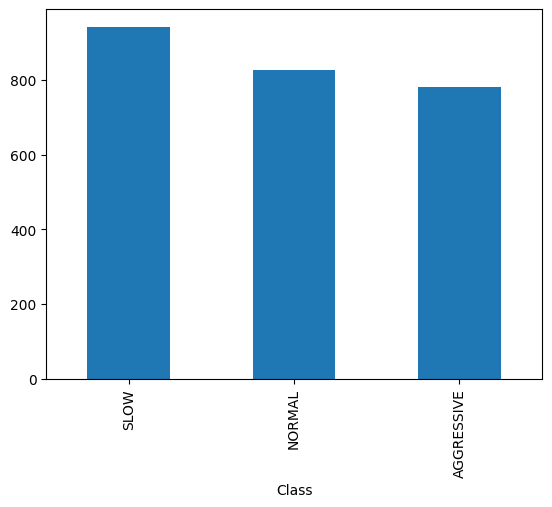

In [65]:
y_train['Class'].value_counts().plot(kind='bar')

In [66]:
# As ML/DL algorithms are working with numbers
# the labels should be mapped to numbers
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
y_train = labelEncoder.fit_transform(y_train)
y_test = labelEncoder.transform(y_test)


d:\Facultad\Inteligencia artificial 2\Ch4\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
d:\Facultad\Inteligencia artificial 2\Ch4\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [67]:
y_validation =labelEncoder.fit_transform(y_validation)

d:\Facultad\Inteligencia artificial 2\Ch4\lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [68]:
# Because I'm using CategoricalCrossentropy loss function
# I have to convert my labels to one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=3)
y_validation = to_categorical(y_validation, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)

In [69]:
# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder

# ### Categorical data to be converted to numeric data


# ### integer mapping using LabelEncoder
# label_encoder = LabelEncoder()
# integer_encoded = label_encoder.fit_transform(y_train)
# print(integer_encoded)
# integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)

# ### One hot encoding
# onehot_encoder = OneHotEncoder(sparse=False)
# y_train = onehot_encoder.fit_transform(integer_encoded)



In [70]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [71]:
y_validation

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [72]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [73]:
X_train=X_train.to_numpy()

X_test=X_test.to_numpy()

In [74]:
X_validation=X_validation.to_numpy()

In [75]:
X_train

array([[ 0.3930235 ,  0.05707079, -0.3075962 , -0.00290161, -0.03115413,
         0.00847575],
       [ 0.48250246,  0.573888  , -0.41881466, -0.0364992 ,  0.07757989,
         0.07139488],
       [ 0.47458458,  0.6829182 , -0.771245  ,  0.01053742, -0.08368854,
         0.0622319 ],
       ...,
       [-2.5373418 , -0.44893068,  0.79844093, -0.02611449,  0.08124508,
         0.11110111],
       [-0.30474746,  0.20095214,  0.28292656,  0.00442877, -0.0158825 ,
         0.01458441],
       [-0.2136606 , -1.0284956 ,  0.04707336,  0.04718934,  0.08674286,
         0.01214095]])

In [76]:
type(X_train)

numpy.ndarray

In [77]:
from tensorflow import keras
import tensorflow as tf

In [78]:
X_train.shape

(2550, 6)

In [79]:
y_train.shape

(2550, 3)

In [80]:
y_train

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

In [81]:
X_validation.shape

(1094, 6)

In [82]:
y_validation.shape

(1094, 3)

In [109]:
# Define an event that will stop the training
# depending of the value of "val_loss"
# ------------------------------------------------------------------
# Will stop training if the "val_loss" hasn't improved in 5 epochs.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [110]:
model = keras.Sequential()
# model.add(keras.layers.Flatten(input_shape=(6, )))
# model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(128, activation="relu"))

model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))





model.compile(optimizer='rmsprop', loss="categorical_crossentropy", metrics=["accuracy"])
# model.fit(X_train, y_train, epochs=50, batch_size=200, callbacks=[stop_early],validation_data=(X_validation,y_validation))
model.fit(X_train, y_train, epochs=50, batch_size=128, callbacks=[stop_early],validation_split=0.25)


Epoch 1/50
15/15 [==============================] - 1s 13ms/step - loss: 1.0963 - accuracy: 0.3457 - val_loss: 1.0770 - val_accuracy: 0.4154
Epoch 2/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0773 - accuracy: 0.4132 - val_loss: 1.0610 - val_accuracy: 0.4436
Epoch 3/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0664 - accuracy: 0.4252 - val_loss: 1.0539 - val_accuracy: 0.4498
Epoch 4/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0564 - accuracy: 0.4404 - val_loss: 1.0540 - val_accuracy: 0.4279
Epoch 5/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0498 - accuracy: 0.4367 - val_loss: 1.0491 - val_accuracy: 0.4326
Epoch 6/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0460 - accuracy: 0.4341 - val_loss: 1.0410 - val_accuracy: 0.4420
Epoch 7/50
15/15 [==============================] - 0s 4ms/step - loss: 1.0408 - accuracy: 0.4430 - val_loss: 1.0400 - val_accuracy: 0.4373
Epoch 8/50
15/15 [=

In [111]:
predictions = model.predict(X_test)
predictions[0].argmax()

97/97 [==============================] - 0s 1ms/step


2

In [112]:
predictions[0]

array([0.19744529, 0.37212995, 0.43042484], dtype=float32)

In [113]:
y_test

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

In [114]:
y_test[0]

array([1., 0., 0.], dtype=float32)

In [115]:
predictions[10]

array([0.18098646, 0.37659055, 0.44242305], dtype=float32)

In [116]:
# Get the metrics for our trained model
eval_result = model.evaluate(X_test, y_test)

97/97 [==============================] - 0s 1ms/step - loss: 1.0511 - accuracy: 0.4342


In [117]:
# Transform the predicted scores array to a pretty Dataframe ^^
df_predicted = pd.DataFrame(predictions, columns=['AGGRESSIVE', 'NORMAL', 'SLOW'])
df_predicted

,AGGRESSIVE,NORMAL,SLOW
0,0.197445,0.372130,0.430425
1,0.191629,0.375437,0.432934
2,0.999771,0.000187,0.000042
3,0.999697,0.000255,0.000048
4,0.999517,0.000372,0.000111
...,...,...,...
3079,0.574597,0.185794,0.239610
3080,0.179135,0.377151,0.443714
3081,0.531641,0.154107,0.314252
3082,0.306015,0.394012,0.299973


In [118]:
# Reverse the one hot encoded vector
actual_y_test = np.argmax(y_test, axis=1)
array_actual = labelEncoder.inverse_transform(actual_y_test)

# Transform the given class array to a Dataframe
df_actual = pd.DataFrame(array_actual, columns = ['Original Class'])
df_actual

,Original Class
0,AGGRESSIVE
1,AGGRESSIVE
2,AGGRESSIVE
3,AGGRESSIVE
4,AGGRESSIVE
...,...
3079,SLOW
3080,SLOW
3081,SLOW
3082,SLOW


In [119]:
# Combine the actual and resulted classes
df_result = pd.concat([df_predicted, df_actual], axis=1)
df_result

,AGGRESSIVE,NORMAL,SLOW,Original Class
0,0.197445,0.372130,0.430425,AGGRESSIVE
1,0.191629,0.375437,0.432934,AGGRESSIVE
2,0.999771,0.000187,0.000042,AGGRESSIVE
3,0.999697,0.000255,0.000048,AGGRESSIVE
4,0.999517,0.000372,0.000111,AGGRESSIVE
...,...,...,...,...
3079,0.574597,0.185794,0.239610,SLOW
3080,0.179135,0.377151,0.443714,SLOW
3081,0.531641,0.154107,0.314252,SLOW
3082,0.306015,0.394012,0.299973,SLOW
